# Modeling Framework

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cleaned_analytical_dataset.csv")
data.head()

,source,severity,start_time,end_time,start_lat,start_lng,distance(mi),description,city,county,...,astronomical_twilight,month,day_name,year_week,month_name,year,quarter_name,year_quarter,season,hour_of_day
0,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Zachary,East Baton Rouge,...,Day,6,Wednesday,201924,June,2019,Q2,2019Q2,Summer,10
1,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Sterling,Loudoun,...,Night,12,Saturday,202248,December,2022,Q4,2022Q4,Winter,23
2,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,0.022,Accident on W Central Ave from Floradale Ave t...,Lompoc,Santa Barbara,...,Day,8,Saturday,202233,August,2022,Q3,2022Q3,Summer,13
3,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,Incident on I-90 EB near REST AREA Drive with ...,Austin,Mower,...,Day,2,Monday,202208,February,2022,Q1,2022Q1,Winter,17
4,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,Bakersfield,Kern,...,Night,12,Friday,202049,December,2020,Q4,2020Q4,Winter,1


In [3]:
data.columns

Index(['source', 'severity', 'start_time', 'end_time', 'start_lat',
       'start_lng', 'distance(mi)', 'description', 'city', 'county', 'state',
       'zipcode', 'timezone', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_direction', 'wind_speed(mph)',
       'precipitation(in)', 'weather_condition', 'amenity', 'bump', 'crossing',
       'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
       'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset',
       'civil_twilight', 'nautical_twilight', 'astronomical_twilight', 'month',
       'day_name', 'year_week', 'month_name', 'year', 'quarter_name',
       'year_quarter', 'season', 'hour_of_day'],
      dtype='object')

In [4]:
data.state.value_counts()

state
CA    113155
FL     56619
TX     37332
SC     24491
NY     22555
NC     21728
VA     19482
PA     19334
MN     12312
OR     11430
AZ     11116
GA     11072
IL     10902
TN     10842
MI     10515
LA      9639
MD      9097
NJ      9000
OH      7676
WA      6998
AL      6575
UT      6280
CO      5919
OK      5295
MO      5022
CT      4596
IN      4316
MA      3914
WI      2289
KY      2097
NE      1892
MT      1869
IA      1723
AR      1476
KS      1362
NV      1343
DC      1193
RI      1093
MS       977
DE       904
WV       849
ID       718
NM       636
NH       633
WY       253
ND       238
ME       202
VT        57
SD        19
Name: count, dtype: int64

In [5]:
colo_data = data[data['state'] == 'CO']
south_dakota_data = data[data.state == 'SD']
wyoming_data = data[data.state == 'WY']
vermont_data = data[data.state == 'VT']

In [6]:
feat_for_model = ['severity','temperature(f)','wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)'
       ,'crossing',
       'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
       'stop', 'traffic_calming', 'traffic_signal',
       # 'day_name', 'month_name', 'quarter_name', 'season', 'hour_of_day','state',
       ]
response = 'severity'

In [7]:
# cols_to_conv_to_int = ['crossing',
#        'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
#        'stop', 'traffic_calming', 'traffic_signal']
# data[cols_to_conv_to_int] = data[cols_to_conv_to_int].astype(int)
data['severity'] = data.severity.astype(str) # This is main data
colo_data['severity'] = colo_data.severity.astype(str)
south_dakota_data['severity'] = south_dakota_data.severity.astype(str)
wyoming_data['severity'] = wyoming_data.severity.astype(str)
vermont_data['severity'] = vermont_data.severity.astype(str)

In [8]:
data_filtered = data[feat_for_model]
data_filtered_co = colo_data[feat_for_model]
data_filtered_sd = south_dakota_data[feat_for_model]
data_filtered_wy = wyoming_data[feat_for_model]
data_filtered_vt = vermont_data[feat_for_model]

In [45]:
data_filtered.head()

,severity,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal
0,2,77.0,77.0,62.0,29.92,10.0,5.0,0.0,False,False,False,False,False,False,False,False,False,True
1,2,45.0,43.0,48.0,29.91,10.0,5.0,0.0,False,False,False,False,False,False,False,False,False,False
2,2,68.0,68.0,73.0,29.79,10.0,13.0,0.0,False,False,False,False,False,False,False,False,False,True
3,2,27.0,15.0,86.0,28.49,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False
4,2,42.0,42.0,34.0,29.77,10.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False


## Modeling across states decision trees

### Overall Model

In [57]:
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data_filtered[feat_for_model[1:]]
y = data_filtered[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train_head = X_train.head(10)
X_test_head = X_test.head(10)

X_train_head.to_csv("Data_Subsets/train_sample.csv")
X_test_head.to_csv("Data_Subsets/test_sample.csv")
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True))

# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
# plt.title("Vermont Accidents Decision Tree")
# fn = feat_for_model[1:]
# cn = ['1','2','3','4']
# tree.plot_tree(clf,
#                class_names=cn,
#                feature_names=fn)

In [49]:
X_test.head()

,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal
160423,91.0,91.000000,55.0,29.85,10.0,6.0,0.017072,False,False,False,False,False,False,False,False,False,False
429474,31.0,23.000000,92.0,29.18,2.0,9.0,0.000000,False,False,False,False,False,False,False,False,False,False
344131,70.0,70.000000,30.0,29.86,10.0,0.0,0.000000,False,False,False,False,False,False,False,False,False,False
496382,76.0,76.000000,58.0,29.61,10.0,5.0,0.000000,False,False,False,False,False,False,False,False,False,False
60947,66.9,71.676259,63.0,30.00,10.0,4.6,0.011174,False,False,False,False,False,False,False,False,False,True


### Colorado Data Model

Accuracy: 0.5658783783783784
[[  0   8   3   3]
 [ 13 512 177  53]
 [  6 166 145  22]
 [  0  47  16  13]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.70      0.68      0.69       755
           3       0.43      0.43      0.43       339
           4       0.14      0.17      0.16        76

    accuracy                           0.57      1184
   macro avg       0.32      0.32      0.32      1184
weighted avg       0.58      0.57      0.57      1184

Axes(0.125,0.11;0.62x0.77)


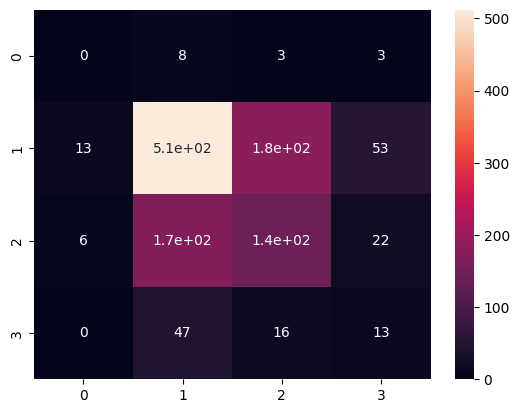

In [23]:
X = data_filtered_co[feat_for_model[1:]]
y = data_filtered_co[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True))


### South Dakota Model

Accuracy: 0.75
[[2 1]
 [0 1]]
              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           4       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



[Text(0.6, 0.875, 'wind_chill(f) <= 54.0\nentropy = 0.971\nsamples = 15\nvalue = [9, 6]\nclass = 1'),
 Text(0.4, 0.625, 'wind_speed(mph) <= 6.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]\nclass = 2'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 1'),
 Text(0.6, 0.375, 'pressure(in) <= 29.995\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = 2'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 2'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 1')]

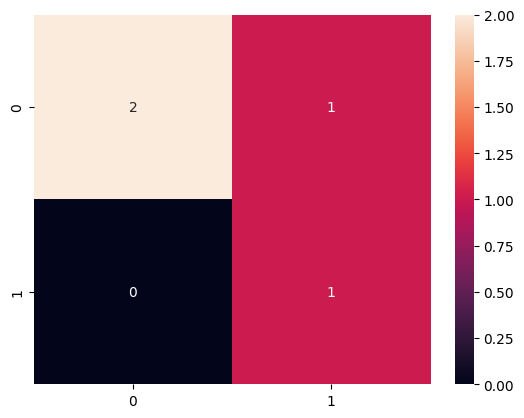

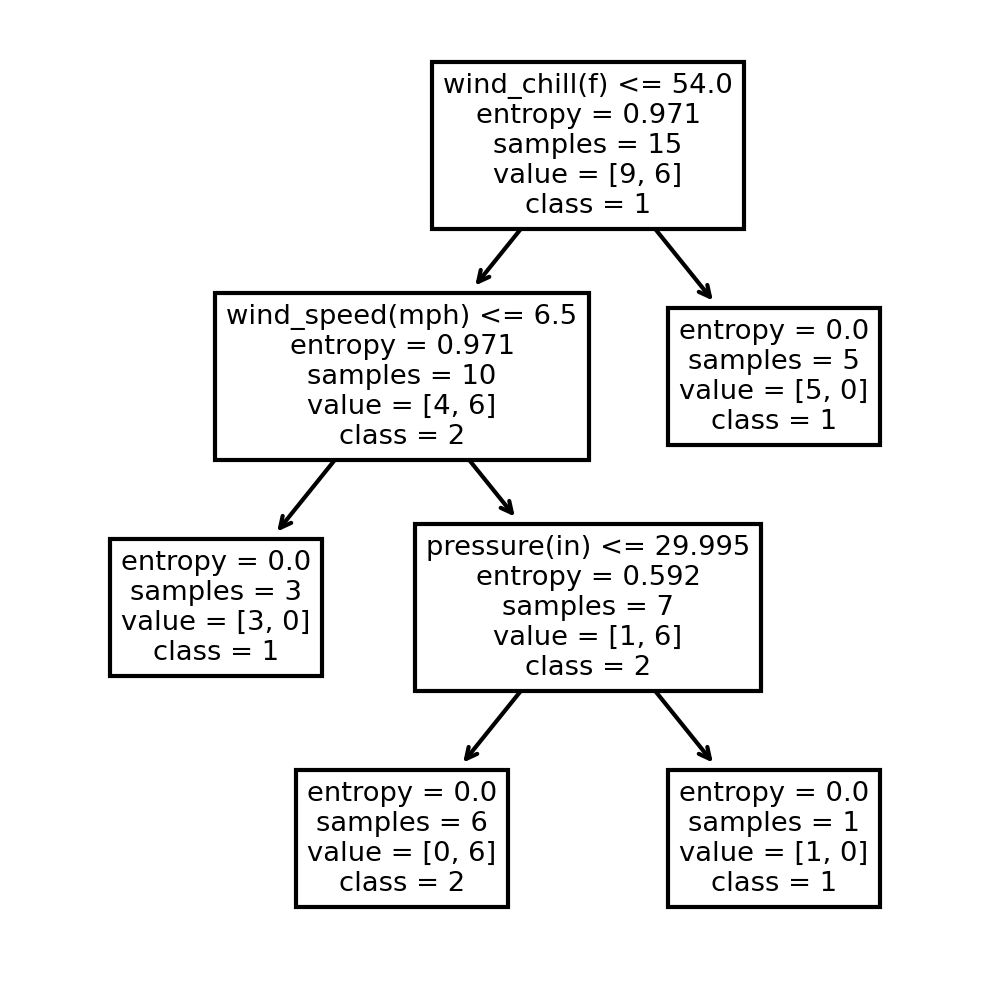

In [24]:
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data_filtered_sd[feat_for_model[1:]]
y = data_filtered_sd[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plt.title("Vermont Accidents Decision Tree")
fn = feat_for_model[1:]
cn = ['1','2','3','4']
tree.plot_tree(clf,
               class_names=cn,
               feature_names=fn)

### Wyoming Model

Accuracy: 0.7450980392156863
[[35  4  3]
 [ 2  0  0]
 [ 4  0  3]]
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        42
           3       0.00      0.00      0.00         2
           4       0.50      0.43      0.46         7

    accuracy                           0.75        51
   macro avg       0.45      0.42      0.43        51
weighted avg       0.77      0.75      0.76        51



[Text(0.5696614583333334, 0.9705882352941176, 'pressure(in) <= 25.695\nentropy = 0.874\nsamples = 202\nvalue = [163, 11, 28]\nclass = 1'),
 Text(0.2955729166666667, 0.9117647058823529, 'wind_chill(f) <= 25.5\nentropy = 0.68\nsamples = 176\nvalue = [150, 3, 23]\nclass = 1'),
 Text(0.08333333333333333, 0.8529411764705882, 'visibility(mi) <= 8.0\nentropy = 0.387\nsamples = 119\nvalue = [110, 0, 9]\nclass = 1'),
 Text(0.0625, 0.7941176470588235, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = 1'),
 Text(0.10416666666666667, 0.7941176470588235, 'humidity(%) <= 83.5\nentropy = 0.495\nsamples = 83\nvalue = [74, 0, 9]\nclass = 1'),
 Text(0.0625, 0.7352941176470589, 'pressure(in) <= 22.975\nentropy = 0.402\nsamples = 75\nvalue = [69, 0, 6]\nclass = 1'),
 Text(0.041666666666666664, 0.6764705882352942, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0]\nclass = 1'),
 Text(0.08333333333333333, 0.6764705882352942, 'pressure(in) <= 23.005\nentropy = 0.48\nsamples = 58\nvalue = [52, 0, 6]\ncl

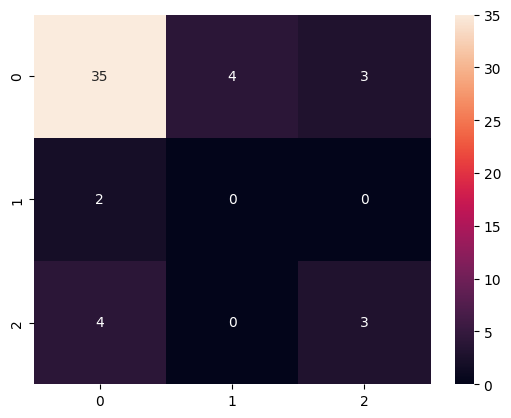

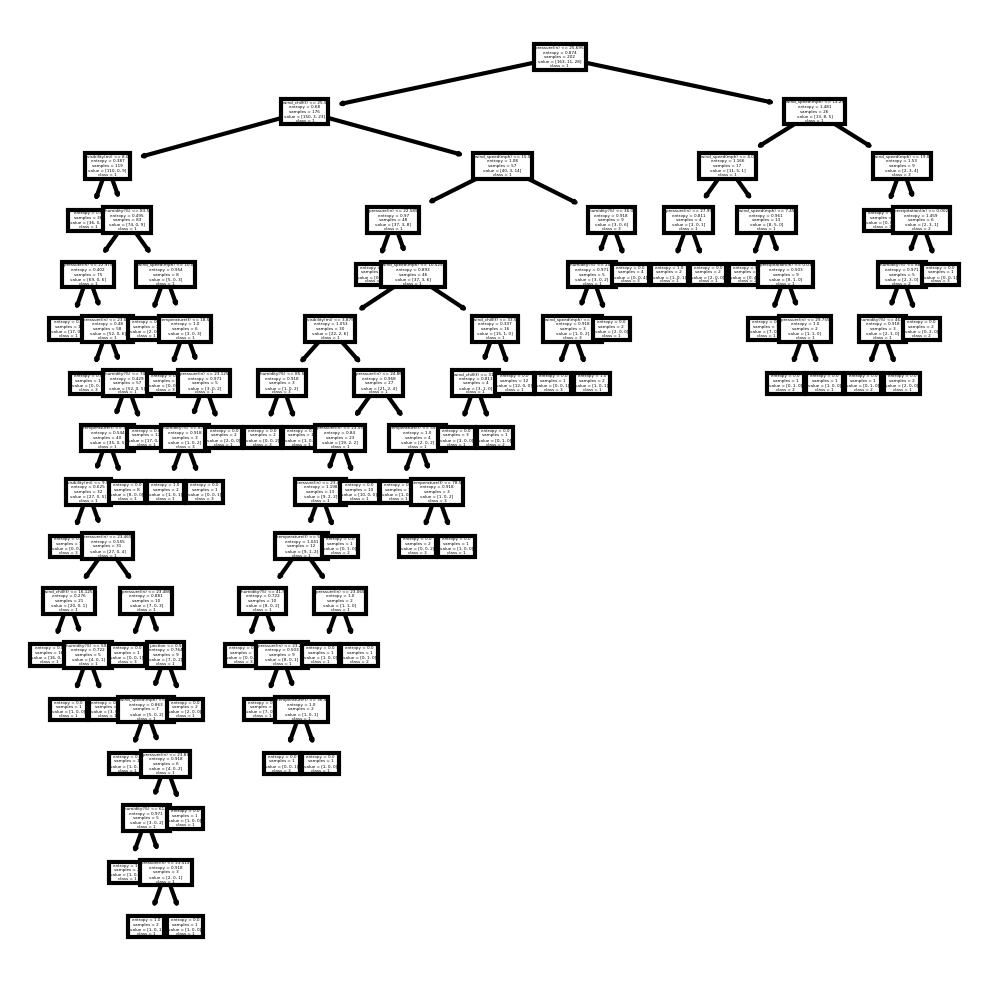

In [25]:
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data_filtered_wy[feat_for_model[1:]]
y = data_filtered_wy[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plt.title("Vermont Accidents Decision Tree")
fn = feat_for_model[1:]
cn = ['1','2','3','4']
tree.plot_tree(clf,
               class_names=cn,
               feature_names=fn)

### Vermont Model

Accuracy: 0.75
[[9 1]
 [2 0]]
              precision    recall  f1-score   support

           2       0.82      0.90      0.86        10
           3       0.00      0.00      0.00         2

    accuracy                           0.75        12
   macro avg       0.41      0.45      0.43        12
weighted avg       0.68      0.75      0.71        12



[Text(0.44047619047619047, 0.9285714285714286, 'wind_speed(mph) <= 3.188\nentropy = 1.145\nsamples = 45\nvalue = [32, 8, 5]\nclass = 1'),
 Text(0.23809523809523808, 0.7857142857142857, 'pressure(in) <= 29.505\nentropy = 1.46\nsamples = 13\nvalue = [6, 5, 2]\nclass = 1'),
 Text(0.14285714285714285, 0.6428571428571429, 'pressure(in) <= 29.035\nentropy = 0.811\nsamples = 8\nvalue = [6, 2, 0]\nclass = 1'),
 Text(0.09523809523809523, 0.5, 'pressure(in) <= 28.785\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]\nclass = 2'),
 Text(0.047619047619047616, 0.35714285714285715, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = 1'),
 Text(0.14285714285714285, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 2'),
 Text(0.19047619047619047, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = 1'),
 Text(0.3333333333333333, 0.6428571428571429, 'visibility(mi) <= 5.5\nentropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]\nclass = 2'),
 Text(0.2857142857142857, 0.5, 

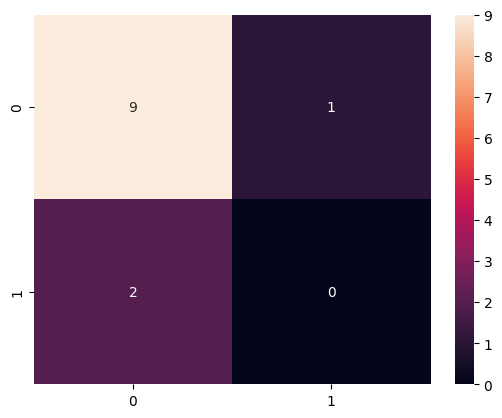

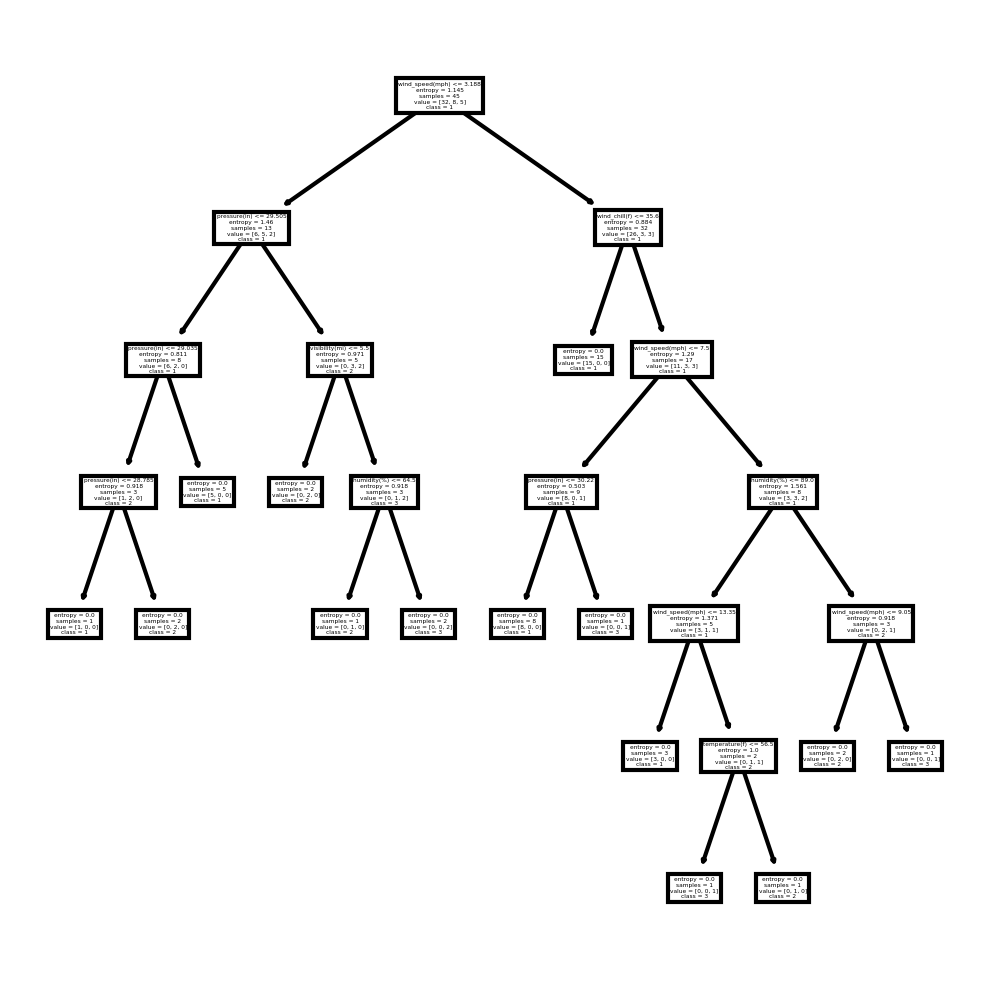

In [26]:
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data_filtered_vt[feat_for_model[1:]]
y = data_filtered_vt[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plt.title("Vermont Accidents Decision Tree")
fn = feat_for_model[1:]
cn = ['1','2','3','4']
tree.plot_tree(clf,
               class_names=cn,
               feature_names=fn)

## Modeling across states Naive Bayes

Accuracy: 0.26714559099061186
[[  280   145   460    12]
 [ 8568 11112 58265  1405]
 [  600   966 15182   284]
 [  129   228  2082    89]]
              precision    recall  f1-score   support

           1       0.03      0.31      0.05       897
           2       0.89      0.14      0.24     79350
           3       0.20      0.89      0.33     17032
           4       0.05      0.04      0.04      2528

    accuracy                           0.27     99807
   macro avg       0.29      0.34      0.17     99807
weighted avg       0.75      0.27      0.25     99807

Axes(0.125,0.11;0.62x0.77)


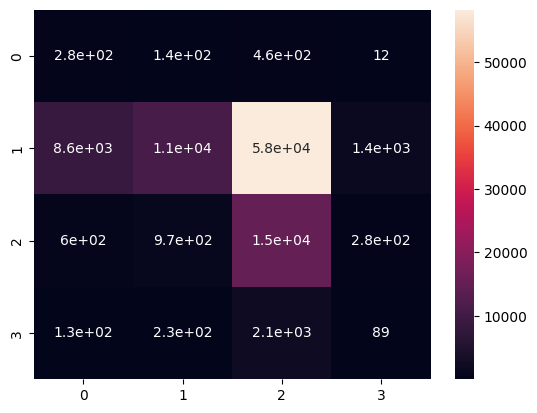

In [50]:
from sklearn.naive_bayes import GaussianNB

X = data_filtered[feat_for_model[1:]]
y = data_filtered[response]

X.crossing = X.crossing.astype(int)
X.give_way = X.give_way.astype(int)
X.junction = X.junction.astype(int)
X.no_exit = X.no_exit.astype(int)
X.railway = X.railway.astype(int)
X.roundabout = X.roundabout.astype(int)
X.station = X.station.astype(int)
X.stop = X.stop.astype(int)
X.traffic_calming = X.traffic_calming.astype(int)
X.traffic_signal = X.traffic_signal.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)


labels_ = ['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred),annot=True))

In [51]:
X.head()

,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal
0,77.0,77.0,62.0,29.92,10.0,5.0,0.0,0,0,0,0,0,0,0,0,0,1
1,45.0,43.0,48.0,29.91,10.0,5.0,0.0,0,0,0,0,0,0,0,0,0,0
2,68.0,68.0,73.0,29.79,10.0,13.0,0.0,0,0,0,0,0,0,0,0,0,1
3,27.0,15.0,86.0,28.49,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0
4,42.0,42.0,34.0,29.77,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test.head()

,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal
235913,66.0,66.0,68.0,28.68,10.0,12.0,0.0,0,0,0,0,0,0,0,0,0,0
366072,63.0,63.0,77.0,29.56,8.0,12.0,0.0,1,0,0,0,0,0,0,0,0,1
185371,27.0,19.0,61.0,24.92,10.0,7.0,0.0,0,0,0,0,0,0,0,0,0,0
59198,50.0,50.0,52.0,28.81,10.0,9.0,0.0,0,0,0,0,0,0,0,0,0,0
471795,69.0,69.0,53.0,30.05,10.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0


## Modeling across states using SVM

In [10]:
X = data_filtered_wy[feat_for_model[1:]]
y = data_filtered_wy[response]

X.crossing = X.crossing.astype(int)
X.give_way = X.give_way.astype(int)
X.junction = X.junction.astype(int)
X.no_exit = X.no_exit.astype(int)
X.railway = X.railway.astype(int)
X.roundabout = X.roundabout.astype(int)
X.station = X.station.astype(int)
X.stop = X.stop.astype(int)
X.traffic_calming = X.traffic_calming.astype(int)
X.traffic_signal = X.traffic_signal.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

0.8235294117647058


<Axes: >

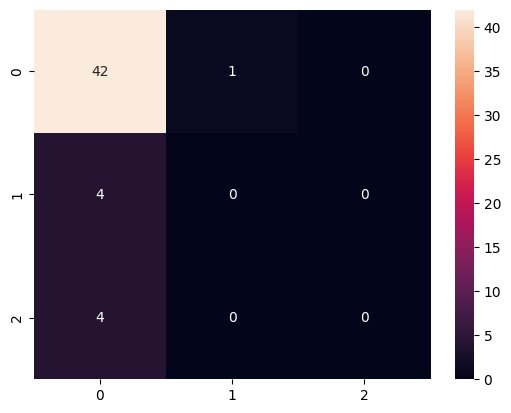

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
svm_classifier_linear = SVC(kernel='linear',C=10)
svm_classifier_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_classifier_linear.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_linear)

print(accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred_linear),annot=True)

0.8431372549019608
Axes(0.125,0.11;0.62x0.77)


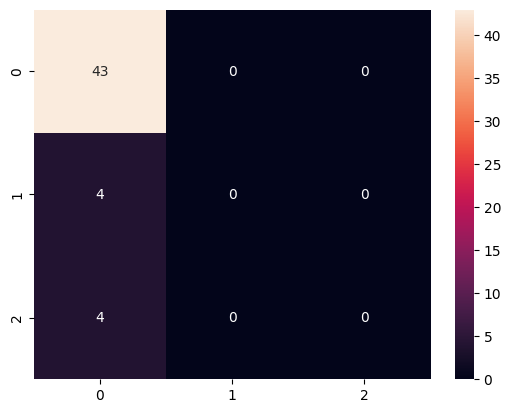

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
svm_classifier_poly = SVC(kernel='poly',degree=3,C=10)
svm_classifier_poly.fit(X_train, y_train)

# Make predictions
y_pred_poly = svm_classifier_poly.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_poly)

print(accuracy)
print(sns.heatmap(confusion_matrix(y_test, y_pred_poly),annot=True))

0.8431372549019608
Axes(0.125,0.11;0.62x0.77)


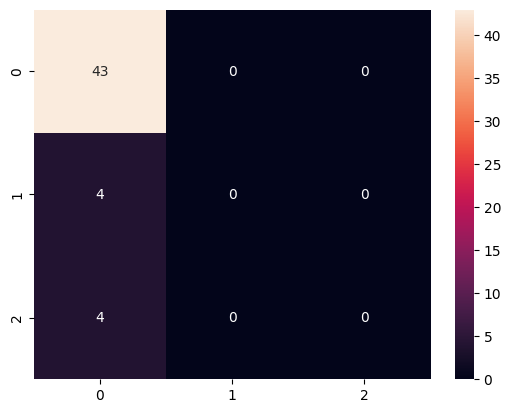

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
svm_classifier_rbf = SVC(kernel='rbf',gamma='scale',C=5)
svm_classifier_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rbf)

print(accuracy)
print(sns.heatmap(confusion_matrix(y_test, y_pred_rbf),annot=True))

0.8431372549019608


<Axes: >

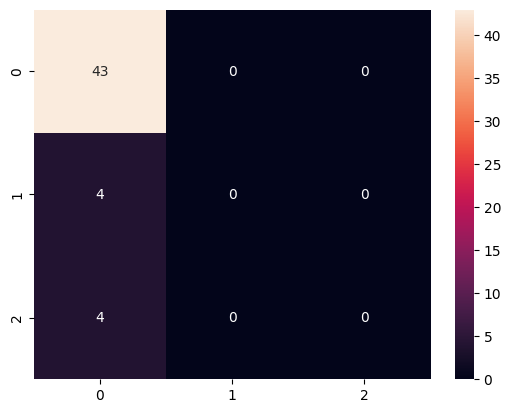

In [56]:
X = data_filtered_wy[feat_for_model[2:4]]
y = data_filtered_wy[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm_classifier_linear_n = SVC(kernel='linear',C=10)
svm_classifier_linear_n.fit(X_train, y_train)

# Make predictions
y_pred_linear_n = svm_classifier_linear_n.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_linear_n)

print(accuracy)

sns.heatmap(confusion_matrix(y_test, y_pred_linear_n),annot=True)